# 6. Regression (Linear and Nonlinear)



In [118]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Linear regression with scipy.stats.linregress 
Check the documentation
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

`scipy.stats.linregress(x, y=None)`

Calculate a linear least-squares regression for two sets of measurements.

Parameters:	
* x, y : array_like
Two sets of measurements. Both arrays should have the same length. If only x is given (and y=None), then it must be a two-dimensional array where one dimension has length 2. The two sets of measurements are then found by splitting the array along the length-2 dimension.

Returns:

* slope : float
  slope of the regression line
* intercept : float
  intercept of the regression line
* rvalue : float
  correlation coefficient
* pvalue : float
  two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.
* stderr : float
  Standard error of the estimate

2.53490566038 -0.193867924528 0.988506780938 0.000197382033495 0.193836934584
Slope: 2.53490566038
Intercept: -0.193867924528
Coefficient of determination (r squared): 0.97714565596
p-value (probability that the slope is zero): 0.000197382033495
Standard error in slope: 0.193836934584


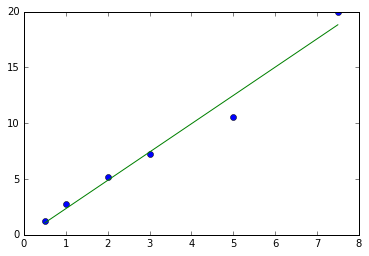

In [119]:
import scipy.stats
x_data = np.array([0.5, 1.0, 2.0, 3.0,  5.0, 7.5])
y_data = np.array([1.2, 2.8, 5.2, 7.2, 10.6, 20.0])
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x_data, y_data)
print slope, intercept, rvalue, pvalue, stderr
print("Slope: {}".format(slope))
print("Intercept: {}".format(intercept))
print("Coefficient of determination (r squared): {}".format(rvalue*rvalue))
print("p-value (probability that the slope is zero): {}".format(pvalue))
print("Standard error in slope: {}".format(stderr))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, x_data*slope+intercept)
plt.show()

Notice that the documentation has a "see also" section that points to optimize.curve_fit. Let's check that out next

## Nonlinear regression with scipy.optimize.curve_fit

`scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, **kwargs)`

This is quite a powerful function, giving access to several methods, bounds on the parameters, rescaling options, etc., so it's worth reading the documentation:
http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

However, for a simple case it's quite easy to use.
We define a function `f(x)` such that `ydata = f(xdata, *params) + eps` and it will optimize the parameters `params` to minimize the square of the errors `eps`, i.e. make the function `f` fit the data (`xdata, ydata`).


For the simplest example, we can use it to fit a linear function like we did above. (Though if we *did* want to fit a linear funciton, we'd probably use the method above).

Slope: 2.53490565563
Intercept: -0.193867897728
Slope: 2.53490565563 +/- 0.193836926786 (1 st. dev.)
Intercept: -0.193867897728 +/- 0.773325933928 (1 st. dev.)


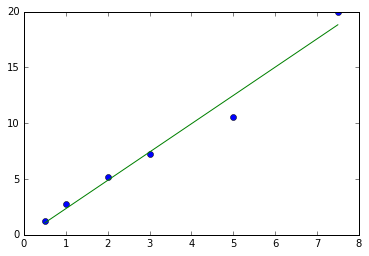

In [120]:
import scipy.optimize
def linear_function(x, slope, intercept):
    return x*slope + intercept

x_data = np.array([0.5, 1.0, 2.0, 3.0,  5.0, 7.5])
y_data = np.array([1.2, 2.8, 5.2, 7.2, 10.6, 20.0])

optimal_parameters, covariance = scipy.optimize.curve_fit(linear_function, x_data, y_data)
# That's it! In this exampe we didn't even need to give it a starting guess!
print("Slope: {}".format(optimal_parameters[0]))
print("Intercept: {}".format(optimal_parameters[1]))

# Use the covariance matrix to find the standard errors.
# The diagonals give the variance, so...
parameter_errors = np.sqrt(np.diag(covariance))
print("Slope: {} +/- {} (1 st. dev.)".format(optimal_parameters[0],parameter_errors[0]))
print("Intercept: {} +/- {} (1 st. dev.)".format(optimal_parameters[1],parameter_errors[1]))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, linear_function(x_data, *optimal_parameters))
plt.show()

Now we will try a more complicated function with three parameters, $a, b, c$:

$$y = f(x) = \frac{a x^2}{(1 + b x + c x^2)}$$

I generated some pretend data by using the function with $(a,b,c) = (20, 0.5, 20)$ then adding some random noise and tweaking one of the points slightly. We'll see if we can retrieve the paramaters by fitting the function to my pretend data.


Parameter 0: 15.8038699389 +/- 4.5504711695 (1 st. dev.)
Parameter 1: -0.469529621304 +/- 1.24919516216 (1 st. dev.)
Parameter 2: 16.3421632137 +/- 3.57345032185 (1 st. dev.)


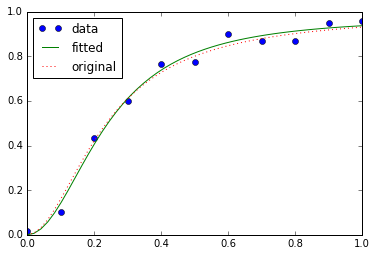

In [121]:
def complicated_function(x, a, b, c):
    "A more complicated function with 3 parameters"
    return a*x*x / (1 + b*x + c*x*x)

# These data were generated by adding random noise to the original function like this:
#x_data = np.linspace(0,1,11)
#y_data = complicated_function(x,20,0.5,20)*(1+np.random.normal(scale=0.05,size=x.size))+np.random.normal(scale=0.05,size=x.size)
# (then manually tweaked a bit)
x_data = np.array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])
y_data = np.array([ 0.01717205,  0.1005844 ,  0.43536816,  0.59862244,  0.76359374,
        0.77385322,  0.89904593,  0.86883376,  0.87039673,  .95,
        0.95870025])

# Fit the parameters to the imperfect x_data and y_data
optimal_parameters, covariance = scipy.optimize.curve_fit(complicated_function,
                                                          x_data,
                                                          y_data)
def report(optimal_parameters, covariance):
    "Make this a function so we can reuse it in cells below"
    parameter_errors = np.sqrt(np.diag(covariance))
    for i in range(len(optimal_parameters)):
        print("Parameter {}: {} +/- {} (1 st. dev.)".format(i,
                                                            optimal_parameters[i],
                                                            parameter_errors[i]))

    # Plot the data
    plt.plot(x_data, y_data, 'o', label='data')

    # Make a new x array with 50 points for smoother lines
    x_many_points = np.linspace(x_data.min(),x_data.max(),50)
    # Plot the fitted curve
    plt.plot(x_many_points, complicated_function(x_many_points, *optimal_parameters), label='fitted')
    # Plot the original curve used to generate the data in the first place
    plt.plot(x_many_points, complicated_function(x_many_points,20,0.5,20), ':',label='original')
    # Add the legend, in the "best" location to avoid hiding the data
    plt.legend(loc='best')
    plt.show()

report(optimal_parameters, covariance)

If we want to enforce all the parameters are positive, we can supply a `bounds` parameter to the `scipy.optimize.curve_fit` function. We use `numpy.inf` for $\infty$.

Parameter 0: 17.3592717205 +/- 5.33028285997 (1 st. dev.)
Parameter 1: 1.46653482597e-12 +/- 1.48509308041 (1 st. dev.)
Parameter 2: 17.4314601977 +/- 4.12859993088 (1 st. dev.)


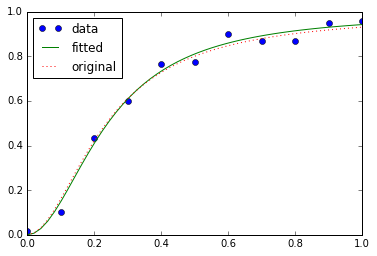

In [122]:
# Set the bounds on all the parameters to be 0 and infinity.
optimal_parameters, covariance = scipy.optimize.curve_fit(complicated_function,
                                                          x_data,
                                                          y_data,
                                                         bounds = (0, np.inf)) # BOUNDS!
report(optimal_parameters, covariance)

We notice the uncertainty on parameter 2 is bigger than parameter 2, i.e. it's possible, given the data, that it is zero. This suggests we can simplify our model and still fit the given data.

One option would just be to enforce the $b$ parameter to be zero (or very close to zero) by specifying different bounds for each parameter:

Parameter 0: 17.359272572 +/- 5.33028104707 (1 st. dev.)
Parameter 1: 8.64673070125e-18 +/- 1.48509243297 (1 st. dev.)
Parameter 2: 17.4314612031 +/- 4.12859896441 (1 st. dev.)


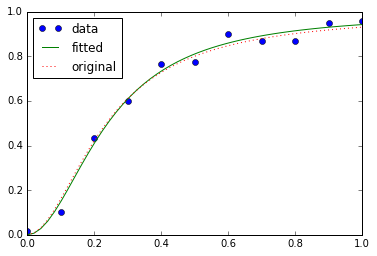

In [123]:
# Set the lower and upper bounds on each parameter separately
bounds = ([0,0,0], [np.inf, 1e-6, np.inf])
optimal_parameters, covariance = scipy.optimize.curve_fit(complicated_function,
                                                          x_data,
                                                          y_data,
                                                         bounds = bounds)
report(optimal_parameters, covariance)

But notice it assigns a big uncertainty to $b$ even though we know (or are assuming) that it is zero. This then changes the uncertainty in $a$ and $c$. It is better to define a new function with only 2 parameters and fit that:

Parameter 0: 17.3592625911 +/- 1.65934756271 (1 st. dev.)
Parameter 1: 17.4314494065 +/- 1.94069966471 (1 st. dev.)


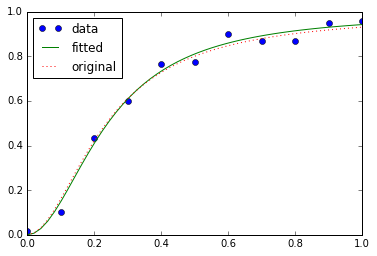

In [124]:
def simplified_function(x, a, c):
    "A slightly simplified function with only 2 parameters: a and c"
    return a*x*x / (1 + c*x*x)
optimal_parameters, covariance = scipy.optimize.curve_fit(simplified_function,
                                                          x_data,
                                                          y_data)
# Can't reuse the 'report' function exactly, so do modify slightly
parameter_errors = np.sqrt(np.diag(covariance))
for i in range(len(optimal_parameters)):
    print("Parameter {}: {} +/- {} (1 st. dev.)".format(i,
                                                        optimal_parameters[i],
                                                        parameter_errors[i]))
plt.plot(x_data, y_data, 'o', label='data')
x_many_points = np.linspace(x_data.min(),x_data.max(),50)
plt.plot(x_many_points, simplified_function(x_many_points, *optimal_parameters), label='fitted')
plt.plot(x_many_points, complicated_function(x_many_points,20,0.5,20), ':',label='original')
plt.legend(loc='best')
plt.show()


The current data are not sufficient to tell the two-parameter model and three-paramaeter models apart.

Note that the function $f(x)$ could be a function of several variables, i.e. $x$ could be a vector, and `x_data` would be a 2-dimensional array.